<a href="https://colab.research.google.com/github/Anushka091922/Jet-tagging-with-convolutional-neural-networks-Particle-Physics-/blob/main/Gradient_Descent.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Gradient descent

## Setup

In [ ]:

%pip install fastai==2.6.0

## Imports

In [ ]:
import torch
from fastai.tabular.all import *
from tqdm.auto import tqdm

## Stochastic gradient descent

### Calculating gradients

In [ ]:
def f(x):
    return x**2

In [ ]:
xt = torch.tensor(3.0, requires_grad=True)
xt

tensor(3., requires_grad=True)

In [ ]:
yt = f(xt)
yt

tensor(9., grad_fn=<PowBackward0>)

In [ ]:
yt.backward()

In [ ]:
xt.grad

tensor(6.)

In [ ]:
xt = torch.tensor([3.0, 4.0, 10.0], requires_grad=True)
xt

tensor([ 3.,  4., 10.], requires_grad=True)

In [ ]:
def f(x):
    return (x**2).sum()


yt = f(xt)
yt

tensor(125., grad_fn=<SumBackward0>)

In [ ]:
yt.backward()
xt.grad

tensor([ 6.,  8., 20.])

## For Example

In [ ]:
time = torch.arange(0, 20).float()

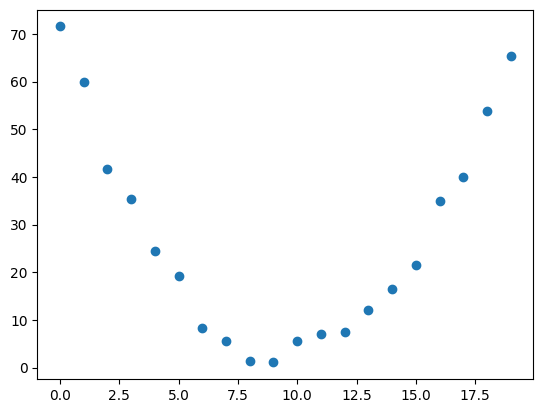

In [ ]:
signal = torch.randn(20) * 3 + 0.75 * (time - 9.5) ** 2 + 1  # 1 * (time - 10) ** 2 + 1
plt.scatter(time, signal);

In [ ]:
def f(t, params):
    a, b, c = params
    return a * (t**2) + (b * t) + c

In [ ]:
def mse(preds, targets):
    return ((preds - targets) ** 2).mean()

### Step 1: Initialize the parameters

In [ ]:
set_seed(666)
params = torch.randn(3).requires_grad_()
params

tensor([-2.1188,  0.0635, -1.4555], requires_grad=True)

### Step 2: Calculate the predictions

In [ ]:
preds = f(time, params)
preds.shape

torch.Size([20])

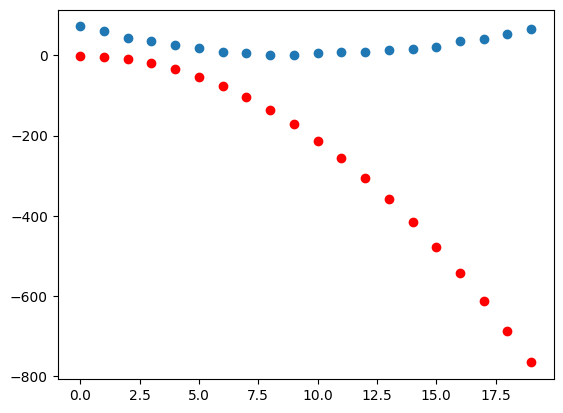

In [ ]:
def show_preds(preds, ax=None):
    if ax is None:
        ax = plt.subplots()[1]
    ax.scatter(time, signal)
    ax.scatter(time, to_np(preds), color="red")
    plt.show()

show_preds(preds)

### Step 3: Calculate the loss

In [ ]:
loss = mse(preds, signal)
loss

tensor(143968.2188, grad_fn=<MeanBackward0>)

### Step 4: Calculate the gradients

In [ ]:
loss.backward()
params.grad

tensor([-126974.1172,   -8154.1045,    -578.2889])

### Step 5: Step the weights

In [ ]:
lr = 1e-5
params.data -= lr * params.data
params.grad = None

In [ ]:
preds = f(time, params)
mse(preds, signal)

tensor(143965.5156, grad_fn=<MeanBackward0>)

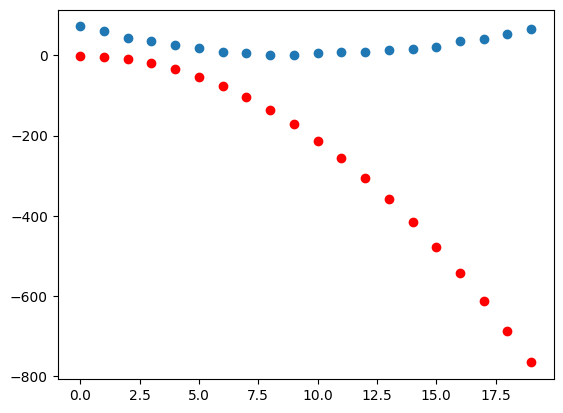

In [ ]:
show_preds(preds)

In [ ]:
def apply_step(params, prn=True):
    preds = f(time, params)
    loss = mse(preds, signal)
    loss.backward()
    params.data -= lr * params.grad.data
    params.grad = None
    if prn:
        print(f"Loss: {loss.item()}")
    return preds

### Step 6: Repeat the process

  0%|          | 0/1000000 [00:00<?, ?it/s]

Iteration: 0
Loss: 143965.515625


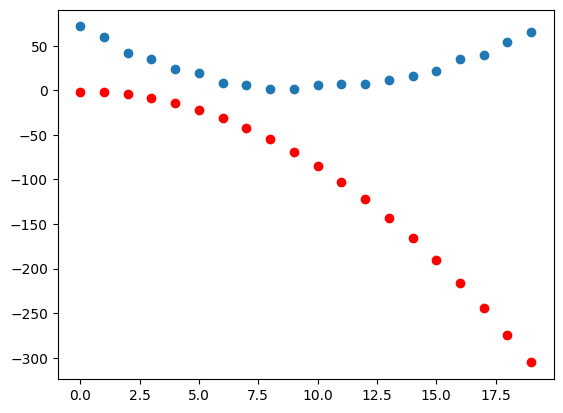

Iteration: 200000
Loss: 250.51138305664062


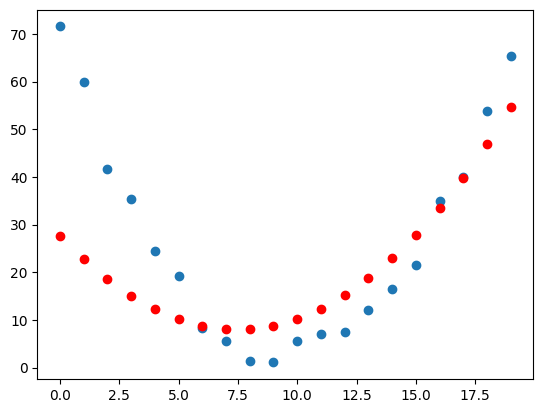

Iteration: 400000
Loss: 92.14946746826172


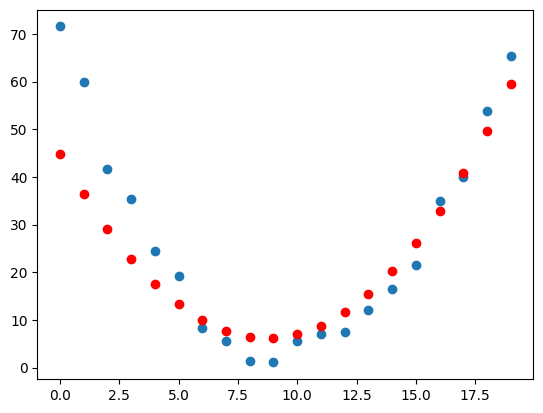

Iteration: 600000
Loss: 35.88349151611328


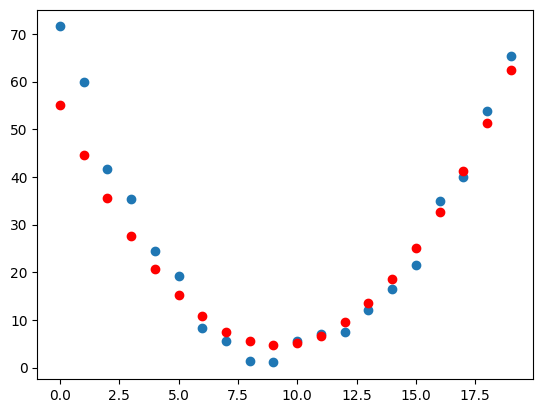

Iteration: 800000
Loss: 15.881726264953613


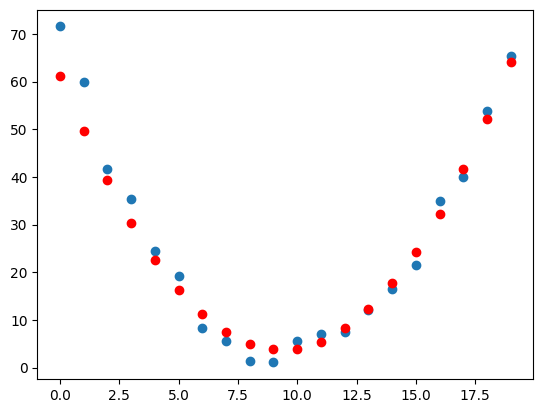

In [ ]:
num_of_iterations = 1_000_000

for iteration in tqdm(range(num_of_iterations)):
    if iteration % 200_000 == 0:
        print(f"Iteration: {iteration}")
        apply_step(params, prn=True)
        preds = f(time, params)
        show_preds(preds)
    else:
        apply_step(params, prn=False)

### Step 7: Stop